### Torch for gradient descent implementation. 

- Gradient descent for linear regression. 

In [1]:
#### import all needed packages for implementation.
import pandas as pd
import numpy as np 
import torch 
import matplotlib.pyplot as plt 
from matplotlib import style 
style.use("ggplot")

In [2]:
#### import sample data 
Data = pd.read_csv("/home/emmanuel/Simplified-gradient-descent/train_1.csv")

In [3]:
Data.head(5)

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [5]:
Data.shape

(333, 15)

In [50]:
### create a bias element 
Data["bias"] = np.ones(Data.shape[0])

In [149]:
### Extract few features and transform them into tensor 
X = torch.as_tensor(Data[["age","tax","ptratio","bias"]].values)
y = torch.as_tensor(Data["medv"].values)

In [150]:
### MinMax scaling method in order to speed up computation.
def Normalize(Data):
    Size = Data.shape[1]
    ### The bias is always considered at the last row of the dataframe.
    Without_bias = Size - 1
    ### Iterate over each column without the bias column
    for m in range(Without_bias):
        Data[:,m] = (Data[:,m] - torch.min(Data[:,m]))/(torch.max(Data[:,m])- torch.min(Data[:,m]))
    #### return the normalize data 
    return Data  

In [151]:
#### The data is normalize now. 
X = Normalize(Data=X)

In [152]:
X

tensor([[0.6298, 0.2065, 0.3140, 1.0000],
        [0.7755, 0.1033, 0.6047, 1.0000],
        [0.4234, 0.0650, 0.7093, 1.0000],
        ...,
        [0.7521, 0.1625, 0.9767, 1.0000],
        [0.9043, 0.1625, 0.9767, 1.0000],
        [0.7957, 0.1625, 0.9767, 1.0000]], dtype=torch.float64)

In [153]:
X.shape

torch.Size([333, 4])

In [176]:
### Now we initialize the weights 
weights = torch.zeros(4,1)
weights

tensor([[0.],
        [0.],
        [0.],
        [0.]])

In [177]:
### predict the y value 
y_pred = X.mm(weights.double())

In [178]:
### calculate for the loss comparing the predicted value to the actual value 
loss = (1/(2*y_pred.shape[0])) * (torch.pow((y_pred - y),2)).sum()
loss.item()

100285.71999999991

In [113]:
weights[0][0] = 387

In [114]:
weights

tensor([[387.0000],
        [ 10.8037],
        [  8.3399],
        [ 11.9657]])

### Gradient descent for linear regression 

- This is to implement gradient descent for linear regression problem using torch 

- Torch is a deeplearning framework 

In [191]:
#### define the training loop for gradient descent. 
Loss = []
epoch = 500
weights = torch.zeros(4,1)
#weights = torch.normal(10,1.5,(4,1))
### learning rate chosen 
alpha = 1e-5
### the number of iterations 
for step in range(epoch):
    ### instantiate the weights 
    w1 = weights[0][0]
    w2 = weights[1][0]
    w3 = weights[2][0]
    bias = weights[3][0]
    ###  predict given the data 
    y_pred = X.mm(weights.double())    
    loss = ((1/(2*y_pred.shape[0])) * (torch.pow((y_pred - y),2)).sum()).item()
    Loss.append(loss/100)
    ###calculate the gradient 
    Grad = (1/y_pred.shape[0]) * ((y_pred - y))
    w1 = w1 - alpha * (1/y_pred.shape[0]) * ((y_pred - y)*(X[:,0])).sum()
    w2 = w2 - alpha * (1/y_pred.shape[0]) * ((y_pred - y)*(X[:,1])).sum()
    w3 = w3 - alpha * (1/y_pred.shape[0]) * ((y_pred - y)*(X[:,2])).sum()
    bias = bias - alpha * (1/y_pred.shape[0]) * (y_pred - y).sum()
    
    ### assign back our new weights 
    weights[0][0] = w1
    weights[1][0] = w2
    weights[2][0] = w3
    weights[3][0] = bias
    ### print our new weights 
    print(f"Epoch: {step+1} loss: {round(loss/100,4)}")
    

Epoch: 1 loss: 1002.8572
Epoch: 2 loss: 991.4376
Epoch: 3 loss: 980.1748
Epoch: 4 loss: 969.0666
Epoch: 5 loss: 958.111
Epoch: 6 loss: 947.3057
Epoch: 7 loss: 936.6487
Epoch: 8 loss: 926.138
Epoch: 9 loss: 915.7716
Epoch: 10 loss: 905.5474
Epoch: 11 loss: 895.4636
Epoch: 12 loss: 885.5181
Epoch: 13 loss: 875.7091
Epoch: 14 loss: 866.0347
Epoch: 15 loss: 856.493
Epoch: 16 loss: 847.0822
Epoch: 17 loss: 837.8005
Epoch: 18 loss: 828.6462
Epoch: 19 loss: 819.6174
Epoch: 20 loss: 810.7125
Epoch: 21 loss: 801.9297
Epoch: 22 loss: 793.2673
Epoch: 23 loss: 784.7237
Epoch: 24 loss: 776.2973
Epoch: 25 loss: 767.9864
Epoch: 26 loss: 759.7895
Epoch: 27 loss: 751.705
Epoch: 28 loss: 743.7312
Epoch: 29 loss: 735.8668
Epoch: 30 loss: 728.1102
Epoch: 31 loss: 720.4599
Epoch: 32 loss: 712.9144
Epoch: 33 loss: 705.4724
Epoch: 34 loss: 698.1323
Epoch: 35 loss: 690.8928
Epoch: 36 loss: 683.7524
Epoch: 37 loss: 676.7099
Epoch: 38 loss: 669.7639
Epoch: 39 loss: 662.913
Epoch: 40 loss: 656.156
Epoch: 41 loss

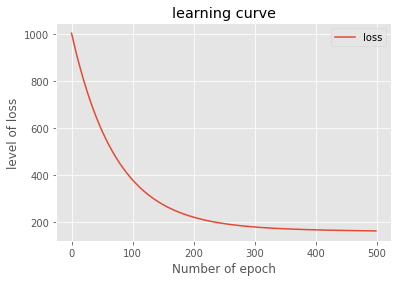

In [194]:
#### definig a training loop 
plt.plot(Loss,label="loss")
plt.xlabel("Number of epoch")
plt.ylabel("level of loss")
plt.title("learning curve")
plt.legend(loc="best")
plt.show()

In [193]:
### new weights calculated 
weights

tensor([[ 6.1378],
        [ 2.7394],
        [ 6.1510],
        [11.7427]])